# Stage 1 - Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
df_sp = pd.read_csv(r"Data\Sealing_Polymer_Data_Trimmed_1_July.csv", encoding = "ISO-8859-1")

C:\Users\shahe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,7,8,9,11,12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,63,67,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,112,113,114,115,116,117,118,119,120,121,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

df_sp.head(n = 5)

<ipython-input-3-1c25552ae122>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Item_goods_group,Article_Prod_Group_EN01,Article,Article_Description,Self_Article_Group_5,Art_Vest_Level_Planning_Profile,Self_Position_Type_Group,Art_Vest_Level_Ordering_Point,Art_Vest_Level_Security_Stock,Art_Vest_Level_Total_Inventory,Article_Basic_Qty_Number_Unit,Art_Vest_Level_Price_Unit,Art_Vest_Level_Gem_Price,Art_Vest_Deprecated_Index_Number,Level_Auto_Number_Order,Art_Level_Min_Series_Size,Art_Vest_Rounding_Value,Art_Vest_Scheduled_Delivery_Time,Art_Vest_Consumption_Last_Year,Art_Vest_Avg_Consumption_Per_Month,Self_Quantity,Stock_Values,Call_Off_Contracts_Total,Customer_Orders_End_Total,Orders_03_19,Orders_04_19,Orders_05_19,Orders_06_19,Orders_07_19,Orders_08_19,Orders_09_19,Orders_10_19,Orders_11_19,Orders_12_19,Orders_01_20,Orders_02_20,Orders_03_20,Purchase_Orders_End_Total,Purchase_Orders_03_19,Purchase_Orders_04_19,Purchase_Orders_05_19,Purchase_Orders_06_19,Purchase_Orders_07_19,Purchase_Orders_08_19,Purchase_Orders_09_19,Purchase_Orders_10_19,Purchase_Orders_11_19,Purchase_Orders_12_19,Purchase_Orders_01_20,Purchase_Orders_02_20,Consumption_Value_Grand_Total,Consumption_Total_03_19,Consumption_Total_04_19,Consumption_Total_05_19,Consumption_Total_06_19,Consumption_Total_07_19,Consumption_Total_08_19,Consumption_Total_09_19,Consumption_Total_10_19,Consumption_Total_11_19,Consumption_Total_12_19,Consumption_Total_01_20,Consumption_Total_02_20,Consumption_Total_03_20,Requirements_Plan_Total,Requirements_Plan_03_20,Requirements_Plan_04_20,Requirements_Plan_05_20,Requirements_Plan_06_20,Requirements_Plan_07_20,Requirements_Plan_08_20,Requirements_Plan_09_20,Requirements_Plan_10_20,Requirements_Plan_11_20,Requirements_Plan_12_20,Requirements_Plan_01_21,Requirements_Plan_02_21,Requirements_Plan_03_21,On_Call_Contracts_05_19,On_Call_Contracts_06_19,On_Call_Contracts_07_19,On_Call_Contracts_08_19,On_Call_Contracts_09_19,On_Call_Contracts_10_19,On_Call_Contracts_11_19,On_Call_Contracts_12_19,On_Call_Contracts_01_20,On_Call_Contracts_02_20,On_Call_Contracts_03_20,On_Call_Contracts_04_20,On_Call_Contracts_05_20,On_Call_Contracts_06_20,On_Call_Contracts_07_20,On_Call_Contracts_08_20,On_Call_Contracts_09_20,On_Call_Contracts_11_20,On_Call_Contracts_12_20,On_Call_Contracts_01_21,On_Call_Contracts_02_21,On_Call_Contracts_03_21,04_21,10_21,12_21,02_22,Consumption,Forecast_Available,Sales_Last_Six_Months_LSM,Cust_Spec_No_Sales_LSM,Iron_Stock,Iron_No_Sales_Last_3_Months_Not_Cust_Spec,Cust_Spec_Or_Bound_And_Iron_Stock,Delivery_Time_Times_Consumption,Avg_Consumption_Per_Month,Standard_Deviation_Per_Month,CV_2,ADI,No_Forecast_No_Consumption,Component_Kitting_SKU,Singular,Smooth,Intermittent,Erratic,Lumpy,Demand_Profile
0,Artikel_Goederengroep (Product Group),Artikel_Prodgroep_artikel EN01(One of four: 22 = moulded rubber; 25 = o-rings; 28 = oil seals; 34 = hydr/pneum seals),Artikel_Artikel(Unique number for article),Artikel_Omschrijving(descriptive code),"(Zelf)_Artikelgroep 5(Stock classification, see doc)","Art# Vest# Niveau_Planningsprofiel(Contract/Iron, see doc)","(Zelf)_Positietypegroep(almost all norm, others = stock for processing, production etc)",Art# Vest# Niveau_Bestelpunt (re-order point),Art# Vest# Niveau_Veiligheidsvoorraad(Safety stock level),Art# Vest# Niveau_Totale voorraad,Artikel_Basishoevh#eenheid,Art# Vest# Niveau_Prijseenheid,Art# Vest# Niveau_Voorts#gem#prijs(price per unit of measure),"Art# Vest# Niveau_Afwaard#kengetal(Level of depreciation, see doc)",Art# Vest# Niveau_Autom#bestelling(If auto re-ordered),"Art# Vest# Niveau_Minimumseriegrootte(min order size, see doc)","Art# Vest# Niveau_Afrondingswaarde(next order amount, after min)","Art# Vest# Niveau_Geplande levertijd(lead time, to our plant)",Art# Vest# Niveau_Verbruik Afgelopen Jaar(past year usage),Art# Vest# Niveau_Gemiddeld Verbruik per Maand(avg usage per month),(Zelf)_Hoeveelheid(Current volume on stock (units)),"(Zelf)_Artikelwaarde(Value of stock, euros)",Afroepcontracten.Eindtotaal(call-off contract volume),Klantorders.Eindtotaal(total order

In [4]:
df_sp = df_sp.iloc[1:]

In [5]:
print (df_sp['Self_Article_Group_5'].value_counts())
print (len(df_sp))

11 (Langzaamlopende voorraad)    8799
03 (Gangbare voorraad)           8153
05 (Klantgebonden Voorraad)      6643
04 (Klantspecifieke Voorraad)    3670
02 (Exit voorraad)               613 
08 (Strategische voorraad)       189 
01 (Intro voorraad)              21  
Name: Self_Article_Group_5, dtype: int64
28438


# Stage 2 - Begin Exploratory Data Analysis:
I've trimmed the dataset from Johan Houtman to 47 siginificant columns (see Google Doc). For each column, I will now pursue ideas such as it's location in TED, and visualisation, to try and gleam information from it, in an exploratory data analysis phase. 
1. Item_goods_group <br>
    i. A subgrouping for product, don't think it will help us to reduce working capital. <br>
    ii. Top 10 occurences of groups plotted below.

<AxesSubplot:>

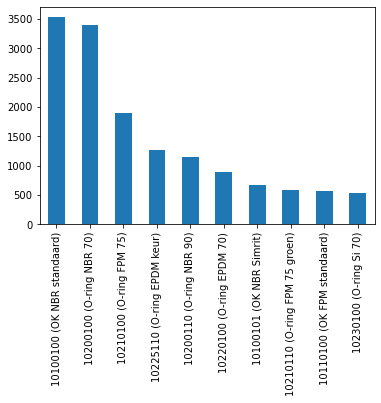

In [6]:
df_sp['Item_goods_group'].value_counts().nlargest(10).plot(kind = 'bar', rot = 90)


2. Article_Prod_Group_EN01 <br>
    i. A higher level grouping, plot of frequency below. 

<AxesSubplot:>

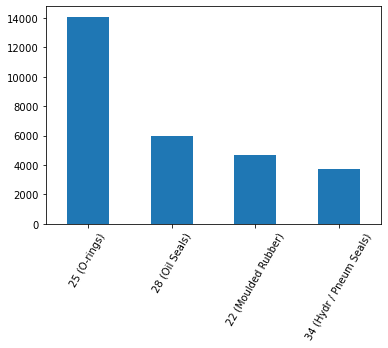

In [7]:
df_sp['Article_Prod_Group_EN01'].value_counts().nlargest(4).plot(kind = 'bar', rot = 60)

3. Article <br>
    i. This could be very useful. Unique identifier for article. <br>
    ii. In the Material table in TED, the MaterialNo column matches with this article identifier. <br>
    iii. But in that table, an entry is 'NL-000000000010000195', so the last eight digits are our identifier. <br>
    iv. We then look to SalesOrderLine table, and we have the MaterialNo column again. <br>
    v. Filtering this table on the material number in iii, we get four entries.<br>
    vi. We look to SalesOrderLineCreationDate. There are three from 2017, and one from 2019. <br>
    vii. Let's crosscheck this against our dataframe:<br>
    viii. In the below query, scrolling to the column 'Orders_08_19', we see a '1'! <br>
    ix. So, we've managed to get all order history for the article, in SQL! 
    


In [8]:
df_sp_10000195 = df_sp[df_sp['Article'] == '10000195']
df_sp_10000195.head() 

,Item_goods_group,Article_Prod_Group_EN01,Article,Article_Description,Self_Article_Group_5,Art_Vest_Level_Planning_Profile,Self_Position_Type_Group,Art_Vest_Level_Ordering_Point,Art_Vest_Level_Security_Stock,Art_Vest_Level_Total_Inventory,Article_Basic_Qty_Number_Unit,Art_Vest_Level_Price_Unit,Art_Vest_Level_Gem_Price,Art_Vest_Deprecated_Index_Number,Level_Auto_Number_Order,Art_Level_Min_Series_Size,Art_Vest_Rounding_Value,Art_Vest_Scheduled_Delivery_Time,Art_Vest_Consumption_Last_Year,Art_Vest_Avg_Consumption_Per_Month,Self_Quantity,Stock_Values,Call_Off_Contracts_Total,Customer_Orders_End_Total,Orders_03_19,Orders_04_19,Orders_05_19,Orders_06_19,Orders_07_19,Orders_08_19,Orders_09_19,Orders_10_19,Orders_11_19,Orders_12_19,Orders_01_20,Orders_02_20,Orders_03_20,Purchase_Orders_End_Total,Purchase_Orders_03_19,Purchase_Orders_04_19,Purchase_Orders_05_19,Purchase_Orders_06_19,Purchase_Orders_07_19,Purchase_Orders_08_19,Purchase_Orders_09_19,Purchase_Orders_10_19,Purchase_Orders_11_19,Purchase_Orders_12_19,Purchase_Orders_01_20,Purchase_Orders_02_20,Consumption_Value_Grand_Total,Consumption_Total_03_19,Consumption_Total_04_19,Consumption_Total_05_19,Consumption_Total_06_19,Consumption_Total_07_19,Consumption_Total_08_19,Consumption_Total_09_19,Consumption_Total_10_19,Consumption_Total_11_19,Consumption_Total_12_19,Consumption_Total_01_20,Consumption_Total_02_20,Consumption_Total_03_20,Requirements_Plan_Total,Requirements_Plan_03_20,Requirements_Plan_04_20,Requirements_Plan_05_20,Requirements_Plan_06_20,Requirements_Plan_07_20,Requirements_Plan_08_20,Requirements_Plan_09_20,Requirements_Plan_10_20,Requirements_Plan_11_20,Requirements_Plan_12_20,Requirements_Plan_01_21,Requirements_Plan_02_21,Requirements_Plan_03_21,On_Call_Contracts_05_19,On_Call_Contracts_06_19,On_Call_Contracts_07_19,On_Call_Contracts_08_19,On_Call_Contracts_09_19,On_Call_Contracts_10_19,On_Call_Contracts_11_19,On_Call_Contracts_12_19,On_Call_Contracts_01_20,On_Call_Contracts_02_20,On_Call_Contracts_03_20,On_Call_Contracts_04_20,On_Call_Contracts_05_20,On_Call_Contracts_06_20,On_Call_Contracts_07_20,On_Call_Contracts_08_20,On_Call_Contracts_09_20,On_Call_Contracts_11_20,On_Call_Contracts_12_20,On_Call_Contracts_01_21,On_Call_Contracts_02_21,On_Call_Contracts_03_21,04_21,10_21,12_21,02_22,Consumption,Forecast_Available,Sales_Last_Six_Months_LSM,Cust_Spec_No_Sales_LSM,Iron_Stock,Iron_No_Sales_Last_3_Months_Not_Cust_Spec,Cust_Spec_Or_Bound_And_Iron_Stock,Delivery_Time_Times_Consumption,Avg_Consumption_Per_Month,Standard_Deviation_Per_Month,CV_2,ADI,No_Forecast_No_Consumption,Component_Kitting_SKU,Singular,Smooth,Intermittent,Erratic,Lumpy,Demand_Profile
149,10500100 (Profielen EPDM vol),22 (Moulded Rubber),10000195,Profiel EPDM vol 55 zwart 3321 L=50,11 (Langzaamlopende voorraad),VPD1,NORM (Normale positie),0,0,49,m (Meter),1,0.7,2,TRUE,50,50,14,1,0.0833333,49, 34.37,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN, 1,No,LSM=0,-,-,-,-, 10,1,0,0,11,0,0,1,0,1,0,0,Singular


x. What we should aim to do next, is write a SQL query to extract the information we need on the full order history for each article. 

4. Article Description <br>
    i. Not important yet. Skip. Can get english version in MaterialDescription column in Material table. <br>
5. Self_Article_Group_5 <br>
    i. Describes if cust spec, normal etc. Not crucial to find in TED, yet. <br>
    ii. But it will be useful to visualise: <br>
    iii. 11 = Slow moving, 03 = Normally running, 05 = 80%+ to one customer, 04 = client specific, 02 = not be replaced(?) <br>
    iv. I think I just want 11. But it will be more interesting to see the below bar chart broken up by demand pattern classification. Do after initial EDA sweep. <br>
    
    



  

<AxesSubplot:>

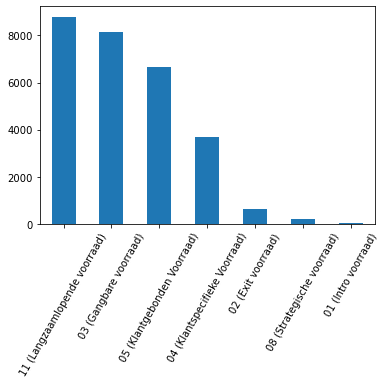

In [9]:
df_sp['Self_Article_Group_5'].value_counts().nlargest(7).plot(kind = 'bar', rot = 60)

6. Art_Vest_Level_Planning_Profile <br>
    i. Contracted or Iron. <br>
    ii. Still don't know what the leading few categories mean. Find out. 


<AxesSubplot:>

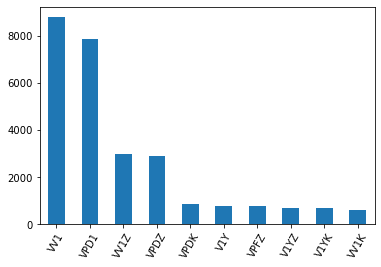

In [10]:
df_sp['Art_Vest_Level_Planning_Profile'].value_counts().nlargest(10).plot(kind = 'bar', rot = 60)

7. Self_Position_Type_Group
    i. Norm = maintained in system, stocked. 
    ii. ZVPR = internal production.
    iii. ZVLO = for manual production, can regard as norm?


<AxesSubplot:>

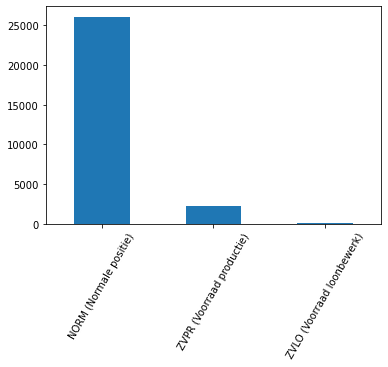

In [11]:
df_sp['Self_Position_Type_Group'].value_counts().nlargest(3).plot(kind = 'bar', rot = 60)

8. Art_Vest_Level_Ordering_Point <br>
    i. Data on re-order points. Let's form a histogram. 

array([[<AxesSubplot:title={'center':'Art_Vest_Level_Ordering_Point'}>]],
      dtype=object)

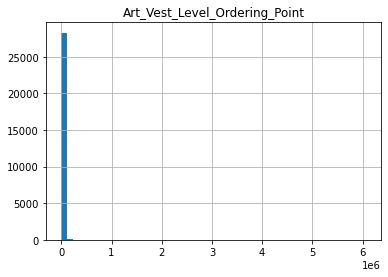

In [12]:
df_sp['Art_Vest_Level_Ordering_Point'] = df_sp['Art_Vest_Level_Ordering_Point'].astype(float)
df_sp.hist(column = 'Art_Vest_Level_Ordering_Point', bins = 50)

There seems to be some incredibly large, anomalous values. How many are there?

In [13]:
print (len(df_sp[df_sp['Art_Vest_Level_Ordering_Point'] > 10000]))
print (len(df_sp[df_sp['Art_Vest_Level_Ordering_Point'] > 100000]))
print (len(df_sp[df_sp['Art_Vest_Level_Ordering_Point'] > 1000000]))


1281
217
8


There seems to be a fat tail of large order re-order points. Let's put a log scale on the x axis. There's also a lot near zero seemingly, so let's log the y axis. 

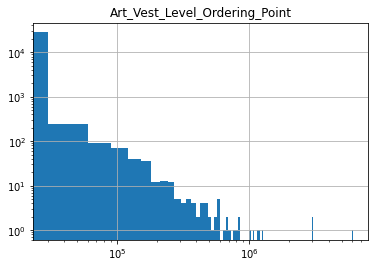

In [14]:
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Level_Ordering_Point', bins = 200, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

Can only get a rough feel for re-order points. A lot of small values, a few very big values. 

9. Art_Vest_Level_Security_Stock
    i. Safety stock levels - similar as 8? Histogram. 

array([[<AxesSubplot:title={'center':'Art_Vest_Level_Security_Stock'}>]],
      dtype=object)

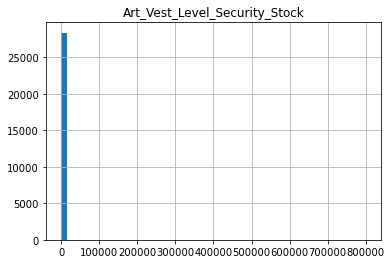

In [15]:
df_sp['Art_Vest_Level_Security_Stock'] = df_sp['Art_Vest_Level_Security_Stock'].astype(float)
df_sp.hist(column = 'Art_Vest_Level_Security_Stock', bins = 50)

Log both axes. 

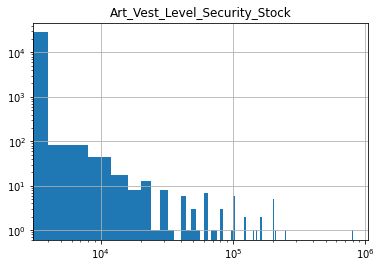

In [16]:
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Level_Security_Stock', bins = 200, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

NOTE: CHECK O-RING COST PER UNIT, PROBABLY SKEWING NUMBERS

Similar behaviour in safety stock levels. 

10. Art_Vest_Level_Total_Inventory <br>
    i. Total Inventory
    ii. Same as above re plotting, but do we have this data in TED? 
    iii. Check if so. 

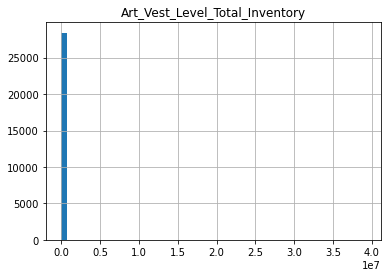

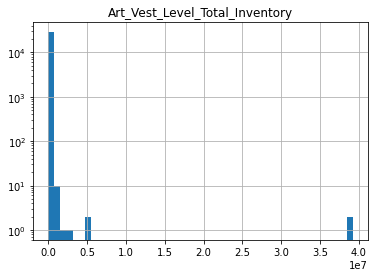

In [17]:
df_sp['Art_Vest_Level_Total_Inventory'] = df_sp['Art_Vest_Level_Total_Inventory'].astype(float)
df_sp.hist(column = 'Art_Vest_Level_Total_Inventory', bins = 50)
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Level_Total_Inventory', bins = 50, ax = ax)
#ax.set_xscale('log')
ax.set_yscale('log')

11. Article_Basic_Qty_Number_Unit - Skip. <br>
12. Art_Vest_Level_Price_Unit - Skip. <br>
13. Art_Vest_Level_Gem_Price: <br>
    i. Price per unit, bin as above. 

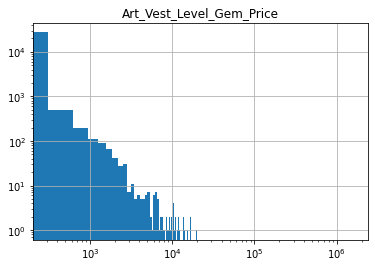

In [18]:
df_sp['Art_Vest_Level_Gem_Price'] = df_sp['Art_Vest_Level_Gem_Price'].astype(float)
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Level_Gem_Price', bins = 5000, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

14. Art_Vest_Deprecated_Index_Number <br>
    i. Depreciation factor (one through 29 or so). <br>
    ii. If 50% not sold in a year, up a level of depreciation

<AxesSubplot:>

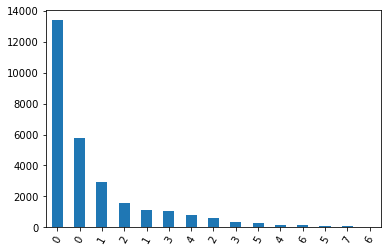

In [19]:
df_sp['Art_Vest_Deprecated_Index_Number'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

15. Level_Auto_Number_Order: <br>
    i. If the product is automatically re-ordered <br>
    ii. Usually if ordered >5 times in a year
    
    

<AxesSubplot:>

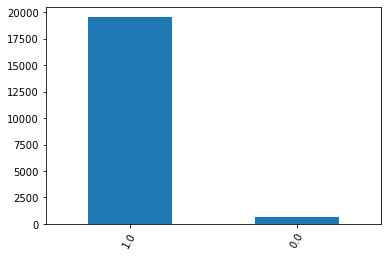

In [20]:
df_sp['Level_Auto_Number_Order'] = pd.to_numeric(df_sp['Level_Auto_Number_Order'], errors='coerce')

df_sp['Level_Auto_Number_Order'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

Most are automatically re-ordered?

16. Art_Level_Min_Series_Size <br>
    i. MOQ 

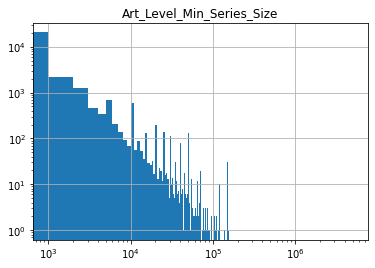

In [21]:
df_sp['Art_Level_Min_Series_Size'] = df_sp['Art_Level_Min_Series_Size'].astype(float)
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Level_Min_Series_Size', bins = 5000, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

17. Art_Vest_Rounding_Value <br>
    i. Next order amount (after MOQ) <br>
    ii. Skip for now. <br>

18. Art_Vest_Scheduled_Delivery_Time <br>
    i. Lead time to us
    


array([<AxesSubplot:title={'center':'Art_Vest_Scheduled_Delivery_Time'}>],
      dtype=object)

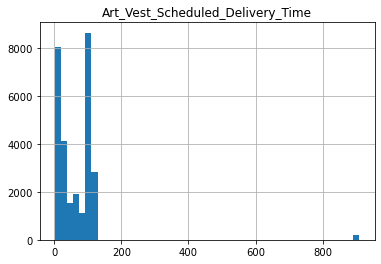

In [22]:
df_sp['Art_Vest_Scheduled_Delivery_Time'] = df_sp['Art_Vest_Scheduled_Delivery_Time'].astype(float)
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Scheduled_Delivery_Time', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')

Subset of values?

<AxesSubplot:>

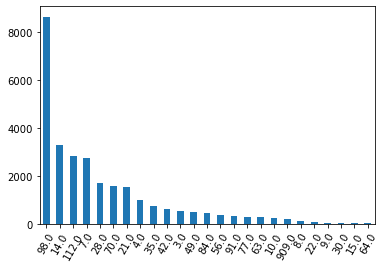

In [23]:
df_sp['Art_Vest_Scheduled_Delivery_Time'].value_counts().nlargest(25).plot(kind = 'bar', rot = 60)

19. Art_Vest_Consumption_Last_Year

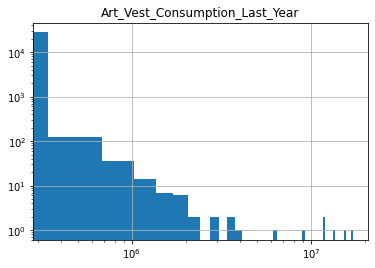

In [24]:
df_sp['Art_Vest_Consumption_Last_Year'] = df_sp['Art_Vest_Consumption_Last_Year'].astype(float)
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Consumption_Last_Year', bins = 50, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

20. Art_Vest_Avg_Consumption_Per_Month

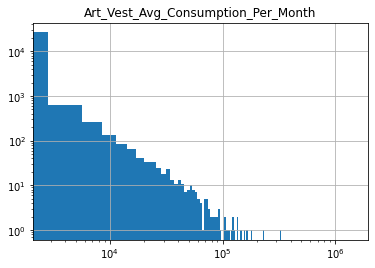

In [25]:
df_sp['Art_Vest_Avg_Consumption_Per_Month'] = df_sp['Art_Vest_Avg_Consumption_Per_Month'].astype(float)
fig, ax = plt.subplots()
df_sp.hist(column = 'Art_Vest_Avg_Consumption_Per_Month', bins = 500, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')

21. Self_Quantity

38500000.0


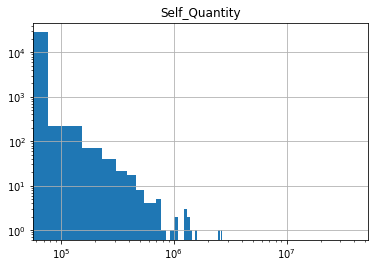

In [26]:
df_sp['Self_Quantity'] = df_sp['Self_Quantity'].str.replace(',', '')
df_sp['Self_Quantity'] = df_sp['Self_Quantity'].astype(float)

fig, ax = plt.subplots()
df_sp.hist(column = 'Self_Quantity', bins = 500, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
print (max(df_sp['Self_Quantity']))

What are these SKUs with enormous values for everything? Are they the same SKUs?

22. Stock_Values <br>
    i. Needed some data cleaning

C:\Users\shahe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,7,8,9,11,12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,63,67,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,112,113,114,115,116,117,118,119,120,121,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Stock_Values,Stock_Values_float_test
12476,,False
17753,,False
25126,,False
25128,,False
27745,,False
28038,,False
28222,,False


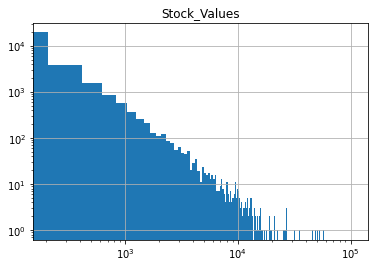

In [27]:
def isfloat(value):
    try:
        float(value)
        return 'True'
    except ValueError:
        return 'False'


df_sp = pd.read_csv(r"Data\Sealing_Polymer_Data_Trimmed_1_July.csv", encoding = "ISO-8859-1")
df_sp = df_sp.iloc[1:]

#Clean non-floats
df_sp['Stock_Values'] = df_sp['Stock_Values'].str.replace(',', '')
df_sp['Stock_Values'] = df_sp['Stock_Values'].str.replace('\x80', '')
df_sp['Stock_Values'] = df_sp['Stock_Values'].str.replace('  -   ', '')
df_sp['Stock_Values'] = df_sp['Stock_Values'].str.replace('NaN', '')
df_sp['Stock_Values'] = df_sp['Stock_Values'].str.replace('', '')

#Check which columns failing float conversion
df_sp['Stock_Values_float_test'] = df_sp['Stock_Values'].apply(isfloat)
df_sp_float_fails = df_sp[df_sp['Stock_Values_float_test'] == 'False']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_sp_float_fails[['Stock_Values', 'Stock_Values_float_test']])

# Empty columns fail, to_numeric beter at handling these errors
df_sp['Stock_Values'] = pd.to_numeric(df_sp['Stock_Values'], errors='coerce')

fig, ax = plt.subplots()
df_sp.hist(column = 'Stock_Values', bins = 500, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')


23. Call_Off_Contracts_Total

nan


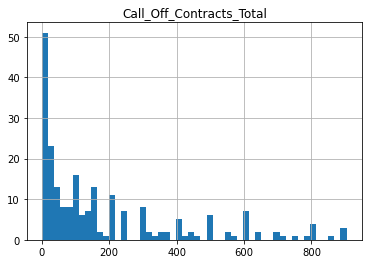

In [28]:
fig, ax = plt.subplots()
df_sp['Call_Off_Contracts_Total'] = pd.to_numeric(df_sp['Call_Off_Contracts_Total'], errors='coerce')

df_sp.hist(column = 'Call_Off_Contracts_Total', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Call_Off_Contracts_Total']))

24. Customer_Orders_End_Total

422.0


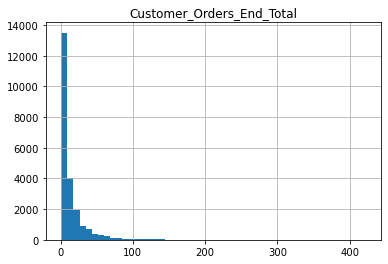

In [29]:
fig, ax = plt.subplots()
df_sp['Customer_Orders_End_Total'] = pd.to_numeric(df_sp['Customer_Orders_End_Total'], errors='coerce')

df_sp.hist(column = 'Customer_Orders_End_Total', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Customer_Orders_End_Total']))

25. Purchase_Orders_End_Total 

46.0


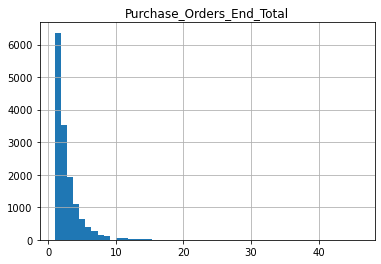

In [30]:
fig, ax = plt.subplots()
df_sp['Purchase_Orders_End_Total'] = pd.to_numeric(df_sp['Purchase_Orders_End_Total'], errors='coerce')

df_sp.hist(column = 'Purchase_Orders_End_Total', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Purchase_Orders_End_Total']))

26. Consumption_Value_Grand_Total

nan


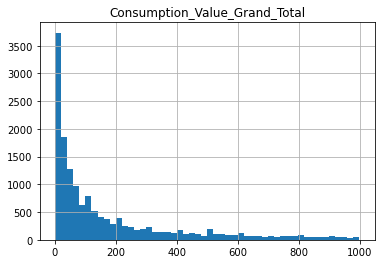

In [31]:
fig, ax = plt.subplots()
df_sp['Consumption_Value_Grand_Total'] = pd.to_numeric(df_sp['Consumption_Value_Grand_Total'], errors='coerce')

df_sp.hist(column = 'Consumption_Value_Grand_Total', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Consumption_Value_Grand_Total']))

27. Requirements_Plan_Total

nan


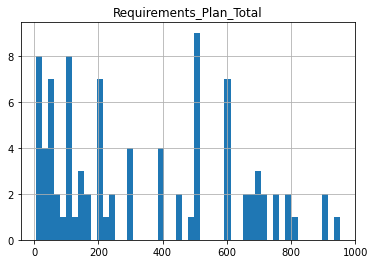

In [32]:
fig, ax = plt.subplots()
df_sp['Requirements_Plan_Total'] = pd.to_numeric(df_sp['Requirements_Plan_Total'], errors='coerce')

df_sp.hist(column = 'Requirements_Plan_Total', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Requirements_Plan_Total']))

28. Consumption <br>
    i. Looks like one massive value exists. Which SKU? Data error?

C:\Users\shahe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,7,8,9,11,12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,63,67,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,112,113,114,115,116,117,118,119,120,121,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


56300000.0


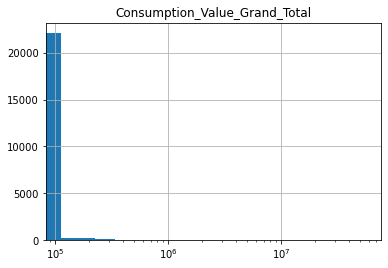

In [34]:
df_sp = pd.read_csv(r"Data\Sealing_Polymer_Data_Trimmed_1_July.csv", encoding = "ISO-8859-1")
df_sp = df_sp.iloc[1:]

fig, ax = plt.subplots()
df_sp['Consumption_Value_Grand_Total'] = df_sp['Consumption_Value_Grand_Total'].str.replace(',', '')
df_sp['Consumption_Value_Grand_Total'] = df_sp['Consumption_Value_Grand_Total'].str.replace('\x80', '')
df_sp['Consumption_Value_Grand_Total'] = df_sp['Consumption_Value_Grand_Total'].str.replace('  -   ', '')
df_sp['Consumption_Value_Grand_Total'] = df_sp['Consumption_Value_Grand_Total'].str.replace('NaN', '')
df_sp['Consumption_Value_Grand_Total'] = df_sp['Consumption_Value_Grand_Total'].str.replace('', '')
df_sp['Consumption_Value_Grand_Total'] = pd.to_numeric(df_sp['Consumption_Value_Grand_Total'], errors='coerce')

df_sp.hist(column = 'Consumption_Value_Grand_Total', bins = 500, ax = ax)
ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Consumption_Value_Grand_Total']))

29. Forecast_Available

<AxesSubplot:>

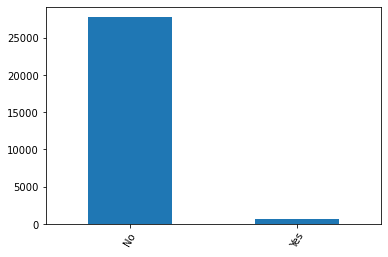

In [35]:
df_sp['Forecast_Available'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

30. Sales_Last_Six_Months_LSM

<AxesSubplot:>

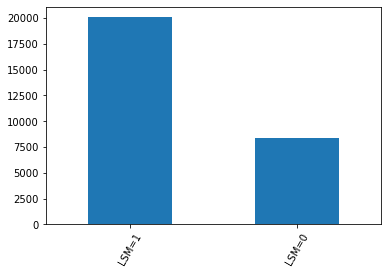

In [36]:
df_sp['Sales_Last_Six_Months_LSM'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

31. Cust_Spec_No_Sales_LSM

<AxesSubplot:>

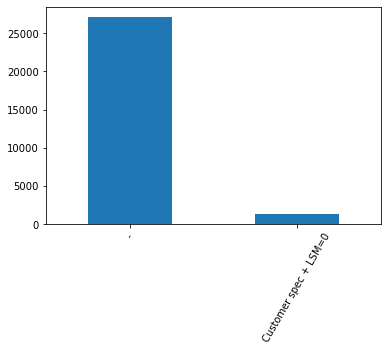

In [37]:
df_sp['Cust_Spec_No_Sales_LSM'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

32. Iron stock

<AxesSubplot:>

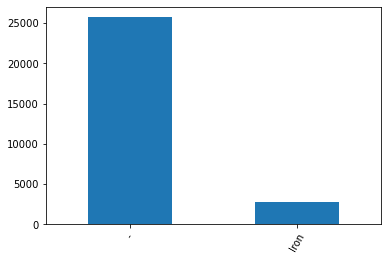

In [38]:
df_sp['Iron_Stock'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

33. Iron_No_Sales_Last_3_Months_Not_Cust_Spec

<AxesSubplot:>

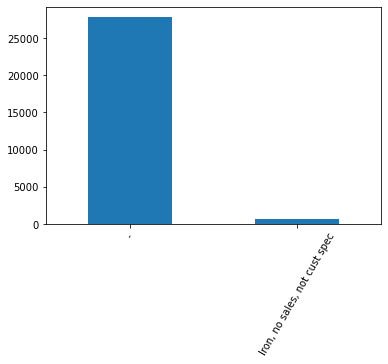

In [39]:
df_sp['Iron_No_Sales_Last_3_Months_Not_Cust_Spec'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

34. Cust_Spec_Or_Bound_And_Iron_Stock

<AxesSubplot:>

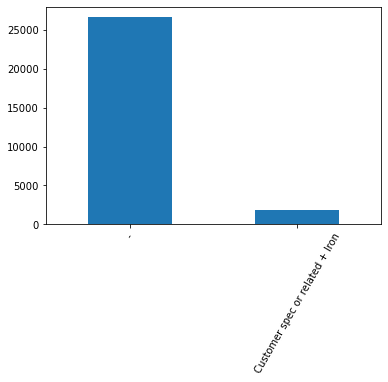

In [40]:
df_sp['Cust_Spec_Or_Bound_And_Iron_Stock'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

35. Delivery_Time_Times_Consumption

49065362.0


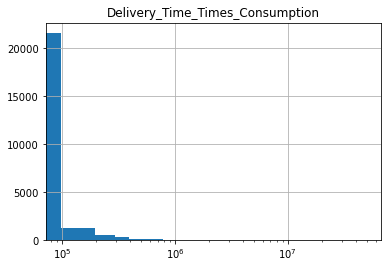

In [42]:
df_sp = pd.read_csv(r"Data\Sealing_Polymer_Data_Trimmed_1_July.csv", encoding = "ISO-8859-1")
df_sp = df_sp.iloc[1:]

fig, ax = plt.subplots()
df_sp['Delivery_Time_Times_Consumption'] = df_sp['Delivery_Time_Times_Consumption'].str.replace(',', '')
df_sp['Delivery_Time_Times_Consumption'] = df_sp['Delivery_Time_Times_Consumption'].str.replace('\x80', '')
df_sp['Delivery_Time_Times_Consumption'] = df_sp['Delivery_Time_Times_Consumption'].str.replace('  -   ', '')
df_sp['Delivery_Time_Times_Consumption'] = df_sp['Delivery_Time_Times_Consumption'].str.replace('NaN', '')
df_sp['Delivery_Time_Times_Consumption'] = df_sp['Delivery_Time_Times_Consumption'].str.replace('', '')
df_sp['Delivery_Time_Times_Consumption'] = pd.to_numeric(df_sp['Delivery_Time_Times_Consumption'], errors='coerce')

df_sp.hist(column = 'Delivery_Time_Times_Consumption', bins = 500, ax = ax)
ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['Delivery_Time_Times_Consumption']))

36. Avg_Consumption_Per_Month

33600000


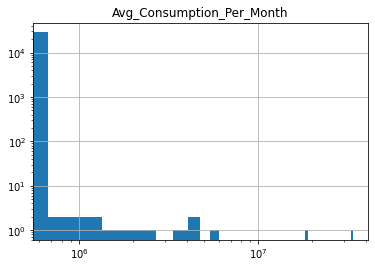

In [43]:
fig, ax = plt.subplots()
df_sp['Avg_Consumption_Per_Month'] = pd.to_numeric(df_sp['Avg_Consumption_Per_Month'], errors='coerce')

df_sp.hist(column = 'Avg_Consumption_Per_Month', bins = 50, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
print (max(df_sp['Avg_Consumption_Per_Month']))

37. Standard_Deviation_Per_Month

28873748


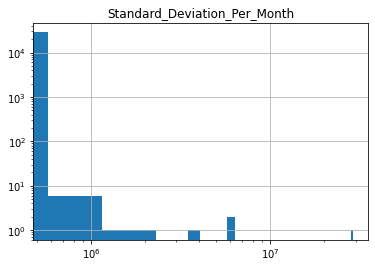

In [44]:
fig, ax = plt.subplots()
df_sp['Standard_Deviation_Per_Month'] = pd.to_numeric(df_sp['Standard_Deviation_Per_Month'], errors='coerce')

df_sp.hist(column = 'Standard_Deviation_Per_Month', bins = 50, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
print (max(df_sp['Standard_Deviation_Per_Month']))

38. CV_2

11.745


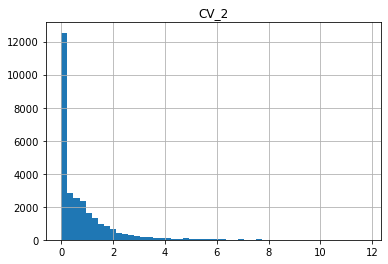

In [45]:
fig, ax = plt.subplots()
df_sp['CV_2'] = pd.to_numeric(df_sp['CV_2'], errors='coerce')

df_sp.hist(column = 'CV_2', bins = 50, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['CV_2']))

39. ADI

12.0


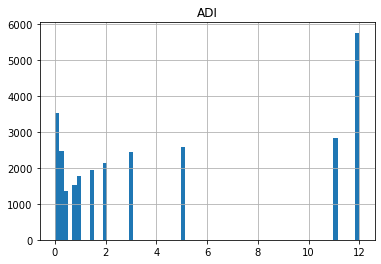

In [46]:
fig, ax = plt.subplots()
df_sp['ADI'] = pd.to_numeric(df_sp['ADI'], errors='coerce')

df_sp.hist(column = 'ADI', bins = 70, ax = ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
print (max(df_sp['ADI']))

40. No_Forecast_No_Consumption

<AxesSubplot:>

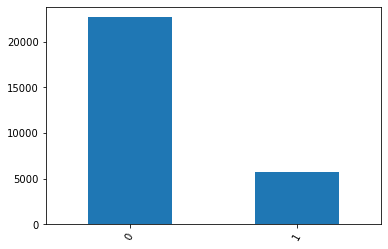

In [47]:
df_sp['No_Forecast_No_Consumption'] = pd.to_numeric(df_sp['No_Forecast_No_Consumption'], errors='coerce')

df_sp['No_Forecast_No_Consumption'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

41. Component_Kitting_SKU 

<AxesSubplot:>

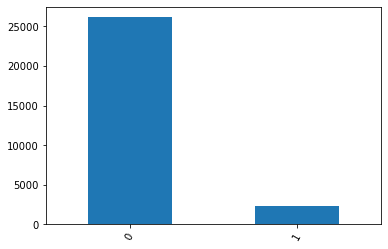

In [48]:
df_sp['Component_Kitting_SKU'] = pd.to_numeric(df_sp['Component_Kitting_SKU'], errors='coerce')

df_sp['Component_Kitting_SKU'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

42. Singular

<AxesSubplot:>

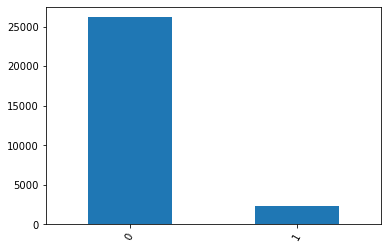

In [49]:
df_sp['Singular'] = pd.to_numeric(df_sp['Singular'], errors='coerce')

df_sp['Singular'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

43. Smooth

<AxesSubplot:>

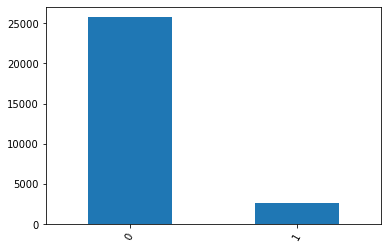

In [50]:
df_sp['Smooth'] = pd.to_numeric(df_sp['Smooth'], errors='coerce')

df_sp['Smooth'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

44. Intermittent

<AxesSubplot:>

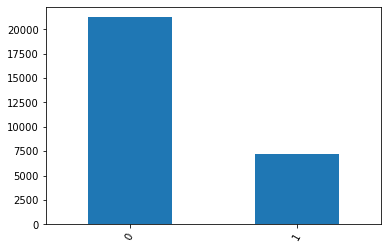

In [51]:
df_sp['Intermittent'] = pd.to_numeric(df_sp['Intermittent'], errors='coerce')

df_sp['Intermittent'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

45. Erratic

<AxesSubplot:>

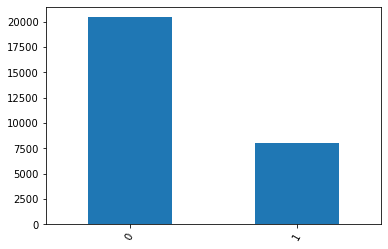

In [52]:
df_sp['Erratic'] = pd.to_numeric(df_sp['Erratic'], errors='coerce')

df_sp['Erratic'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

46. Lumpy

<AxesSubplot:>

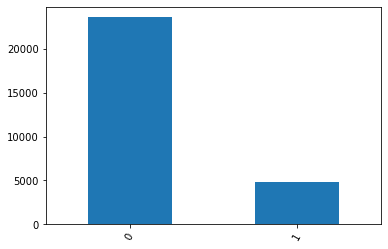

In [53]:
df_sp['Lumpy'] = pd.to_numeric(df_sp['Lumpy'], errors='coerce')

df_sp['Lumpy'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

47. Demand_Profile

<AxesSubplot:>

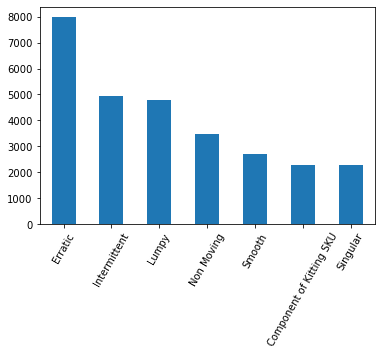

In [56]:
df_sp = pd.read_csv(r"Data\Sealing_Polymer_Data_Trimmed_1_July.csv", encoding = "ISO-8859-1")
df_sp = df_sp.iloc[1:]
df_sp['Demand_Profile'].value_counts().nlargest(15).plot(kind = 'bar', rot = 60)

So many SKUs are erratic or intermittent, improving prediction for such SKUs could help a lot!

# Stage 3 - Extend demand data

Already discussed extending demand data earlier, in Article column discussion. 
MaterialNo column in SalesOrderLine table allows us to filter demand by article number. 
Now, we just need to automate a script to see how similar the data is. 
Pseudocode:
1. For each article number in the S+P dataset:  
    i. Extract the demand histories (amount of product ordered per month, as far back as possible).   
    ii. Reformat the S+P demand data to compare against SQL data.   
    iii. See how similar the two datasets are:  
        a. For the period in the S+P data, see how many analogous datasets from SQL match exactly (for the same timeframe)  
        b. See how many SKUs have additional data in the SQL dataset.  
        c. See how many SKUs have missing data in the SQL dataset.   
        

## 1i. Extract the demand histories (count per month, as far back as possible).  

Structure of SQL output:
| MaterialNo | OrderQuantity | SalesOrderLineCreationDate | 



In [57]:
df_sp.Article = df_sp.Article.astype(str) 
Article_numbers = df_sp.Article.unique()
#print (len(Article_numbers))
sql_list = "("
for x in range(len(Article_numbers)):
    sql_list += "'NL-0000000000" + str(Article_numbers[x]) + "'" + ", " 
sql_list = sql_list[:-2]
sql_list += ")"

script_after = f'SELECT MaterialNo, OrderQuantity, SalesOrderLineCreationDate FROM [ed].[SalesOrderLine] where MaterialNo in {sql_list}'

print (script_after) # Uncomment if you need the SQL script 

SELECT MaterialNo, OrderQuantity, SalesOrderLineCreationDate FROM [ed].[SalesOrderLine] where MaterialNo in ('NL-000000000010000000', 'NL-000000000010000001', 'NL-000000000010000003', 'NL-000000000010000004', 'NL-000000000010000005', 'NL-000000000010000006', 'NL-000000000010000007', 'NL-000000000010000008', 'NL-000000000010000009', 'NL-000000000010000010', 'NL-000000000010000011', 'NL-000000000010000012', 'NL-000000000010000013', 'NL-000000000010000014', 'NL-000000000010000015', 'NL-000000000010000016', 'NL-000000000010000017', 'NL-000000000010000018', 'NL-000000000010000019', 'NL-000000000010000020', 'NL-000000000010000021', 'NL-000000000010000022', 'NL-000000000010000023', 'NL-000000000010000024', 'NL-000000000010000025', 'NL-000000000010000026', 'NL-000000000010000027', 'NL-000000000010000028', 'NL-000000000010000030', 'NL-000000000010000031', 'NL-000000000010000032', 'NL-000000000010000033', 'NL-000000000010000034', 'NL-000000000010000036', 'NL-000000000010000037', 'NL-000000000010

We run the script above in our database, and save the result as a CSV, which we import below. 

In [54]:
df_sp_sql = pd.read_csv(r"C:\Users\Shaheen.Ahmed\Desktop\Utrecht_19_20\ED\Data\Sealing_Polymer_Order_Data_SQL.csv")
df_sp_sql.head()

,MaterialNo,OrderQuantity,SalesOrderLineCreationDate
0,NL-000000000011109475,10.0,6/22/2020
1,NL-000000000010000301,15.0,5/25/2020
2,NL-000000000011109475,20.0,7/15/2020
3,NL-000000000011149568,500.0,7/23/2020
4,NL-000000000010000301,4.0,7/20/2020


Remove trailing digits from MaterialNo

In [55]:
df_sp_sql['MaterialNo'] = df_sp_sql['MaterialNo'].str[13:] # Only run this cell once!
df_sp_sql.head()

,MaterialNo,OrderQuantity,SalesOrderLineCreationDate
0,11109475,10.0,6/22/2020
1,10000301,15.0,5/25/2020
2,11109475,20.0,7/15/2020
3,11149568,500.0,7/23/2020
4,10000301,4.0,7/20/2020


Sum OrderQuantity per month, for each MaterialNo, and get counts per month per MaterialNo

In [56]:
df_sp_sql['SalesOrderLineCreationDate'] = pd.to_datetime(df_sp_sql['SalesOrderLineCreationDate'])
df_sp_sql_group_by = df_sp_sql.groupby([pd.Grouper(key='SalesOrderLineCreationDate', freq='MS'), 'MaterialNo'])
df_sp_sql_group_by_plus_counts = df_sp_sql_group_by.size().to_frame(name='SQL_counts')
df_sp_sql_group_by_plus_counts = df_sp_sql_group_by_plus_counts.join(df_sp_sql_group_by.agg({'OrderQuantity': 'sum'}).rename(columns={'OrderQuantity': 'SQL_OQ'})).reset_index()
df_sp_sql_group_by_plus_counts.head(n = 100)

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ
0,2016-01-01,10000343,1,25.0
1,2016-01-01,10023246,1,5500.0
2,2016-01-01,10023719,1,50.0
3,2016-01-01,10026588,1,100.0
4,2016-01-01,10029496,1,30.0
...,...,...,...,...
95,2016-04-01,10007412,1,2.0
96,2016-04-01,10008639,1,2.0
97,2016-04-01,10008752,1,4.0
98,2016-04-01,10008757,1,4.0


Sanity check:  
Checked order amounts in August 2020 for 13623271, 13603888, and 13551775. All with multiple orders that month. Numbers matched!

## 1 ii. Reformat the S+P demand data to compare against SQL data.  

In [57]:
df_sp.head(n = 5)

,Item_goods_group,Article_Prod_Group_EN01,Article,Article_Description,Self_Article_Group_5,Art_Vest_Level_Planning_Profile,Self_Position_Type_Group,Art_Vest_Level_Ordering_Point,Art_Vest_Level_Security_Stock,Art_Vest_Level_Total_Inventory,Article_Basic_Qty_Number_Unit,Art_Vest_Level_Price_Unit,Art_Vest_Level_Gem_Price,Art_Vest_Deprecated_Index_Number,Level_Auto_Number_Order,Art_Level_Min_Series_Size,Art_Vest_Rounding_Value,Art_Vest_Scheduled_Delivery_Time,Art_Vest_Consumption_Last_Year,Art_Vest_Avg_Consumption_Per_Month,Self_Quantity,Stock_Values,Call_Off_Contracts_Total,Customer_Orders_End_Total,Orders_03_19,Orders_04_19,Orders_05_19,Orders_06_19,Orders_07_19,Orders_08_19,Orders_09_19,Orders_10_19,Orders_11_19,Orders_12_19,Orders_01_20,Orders_02_20,Orders_03_20,Purchase_Orders_End_Total,Purchase_Orders_03_19,Purchase_Orders_04_19,Purchase_Orders_05_19,Purchase_Orders_06_19,Purchase_Orders_07_19,Purchase_Orders_08_19,Purchase_Orders_09_19,Purchase_Orders_10_19,Purchase_Orders_11_19,Purchase_Orders_12_19,Purchase_Orders_01_20,Purchase_Orders_02_20,Consumption_Value_Grand_Total,Consumption_Total_03_19,Consumption_Total_04_19,Consumption_Total_05_19,Consumption_Total_06_19,Consumption_Total_07_19,Consumption_Total_08_19,Consumption_Total_09_19,Consumption_Total_10_19,Consumption_Total_11_19,Consumption_Total_12_19,Consumption_Total_01_20,Consumption_Total_02_20,Consumption_Total_03_20,Requirements_Plan_Total,Requirements_Plan_03_20,Requirements_Plan_04_20,Requirements_Plan_05_20,Requirements_Plan_06_20,Requirements_Plan_07_20,Requirements_Plan_08_20,Requirements_Plan_09_20,Requirements_Plan_10_20,Requirements_Plan_11_20,Requirements_Plan_12_20,Requirements_Plan_01_21,Requirements_Plan_02_21,Requirements_Plan_03_21,On_Call_Contracts_05_19,On_Call_Contracts_06_19,On_Call_Contracts_07_19,On_Call_Contracts_08_19,On_Call_Contracts_09_19,On_Call_Contracts_10_19,On_Call_Contracts_11_19,On_Call_Contracts_12_19,On_Call_Contracts_01_20,On_Call_Contracts_02_20,On_Call_Contracts_03_20,On_Call_Contracts_04_20,On_Call_Contracts_05_20,On_Call_Contracts_06_20,On_Call_Contracts_07_20,On_Call_Contracts_08_20,On_Call_Contracts_09_20,On_Call_Contracts_11_20,On_Call_Contracts_12_20,On_Call_Contracts_01_21,On_Call_Contracts_02_21,On_Call_Contracts_03_21,04_21,10_21,12_21,02_22,Consumption,Forecast_Available,Sales_Last_Six_Months_LSM,Cust_Spec_No_Sales_LSM,Iron_Stock,Iron_No_Sales_Last_3_Months_Not_Cust_Spec,Cust_Spec_Or_Bound_And_Iron_Stock,Delivery_Time_Times_Consumption,Avg_Consumption_Per_Month,Standard_Deviation_Per_Month,CV_2,ADI,No_Forecast_No_Consumption,Component_Kitting_SKU,Singular,Smooth,Intermittent,Erratic,Lumpy,Demand_Profile
1,10510100 (Celr.strip Neopreen),22 (Moulded Rubber),10000000,Prof.CR FEST cel-zelfkl zwart 10x2 L=20,03 (Gangbare voorraad),VV1,NORM (Normale positie),2591,0,2320,m (Meter),1,0.12,0,TRUE,1800,1800,49,8187.096774,682.2580645,"2,320", 281.79,NaN,123,13,6,11,4,10,5,16,17,10,3,18,10,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2,NaN,"11,180",960,380,660,200,560,200,"1,040","2,120","2,260",480,"1,500",820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN, 982,No,LSM=1,-,-,-,-," 48,140",932,695,0.557,0,0,0,0,0,0,1,0,Erratic
2,10510100 (Celr.strip Neopreen),22 (Moulded Rubber),10000001,Prof.CR FEST cel-zelfkl zwart 10x3 L=20,03 (Gangbare voorraad),VV1,NORM (Normale positie),3857,0,4900,m (Meter),1,0.15,0,TRUE,4000,1800,49,16717.41935,1393.11828,"4,900", 723.97,NaN,132,16,14,8,8,12,7,7,22,13,1,11,13,NaN,4,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,1,NaN,"21,840","3,120","3,260",660,"1,460","1,280",140,"4,120","3,140","1,400",20,"2,020","1,220",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN," 2,508",No,LSM=1,-,-,-,-," 122,873",1820,1321,0.527,0,0,0,0,0,0,1,0,Erratic
3,10510100 (Celr.strip Neopreen),22 (

Columns in S+P data to use:
1. Article
2. Orders_03_19 to Orders_02_20
3. Consumption_Total_03_19 to Consumption_Total_02_20 

Let's reduce the unwieldy dataset to the above columns.


In [58]:
df_sp_order_quantities = df_sp[['Article',
                                'Orders_03_19', 
                                'Orders_04_19', 
                                'Orders_05_19',
                                'Orders_06_19',
                                'Orders_07_19',
                                'Orders_08_19',
                                'Orders_09_19',
                                'Orders_10_19',
                                'Orders_11_19',
                                'Orders_12_19',
                                'Orders_01_20',
                                'Orders_02_20',
                                'Consumption_Total_03_19',
                                'Consumption_Total_04_19',
                                'Consumption_Total_05_19',
                                'Consumption_Total_06_19',
                                'Consumption_Total_07_19',
                                'Consumption_Total_08_19',
                                'Consumption_Total_09_19',
                                'Consumption_Total_10_19',
                                'Consumption_Total_11_19',
                                'Consumption_Total_12_19',
                                'Consumption_Total_01_20',
                                'Consumption_Total_02_20']]
df_sp_order_quantities = df_sp_order_quantities.iloc[1:]                               
df_sp_order_quantities.head()


,Article,Orders_03_19,Orders_04_19,Orders_05_19,Orders_06_19,Orders_07_19,Orders_08_19,Orders_09_19,Orders_10_19,Orders_11_19,Orders_12_19,Orders_01_20,Orders_02_20,Consumption_Total_03_19,Consumption_Total_04_19,Consumption_Total_05_19,Consumption_Total_06_19,Consumption_Total_07_19,Consumption_Total_08_19,Consumption_Total_09_19,Consumption_Total_10_19,Consumption_Total_11_19,Consumption_Total_12_19,Consumption_Total_01_20,Consumption_Total_02_20
2,10000001,16,14,8,8,12,7,7,22,13,1,11,13,"3,120","3,260",660,"1,460","1,280",140,"4,120","3,140","1,400",20,"2,020","1,220"
3,10000003,9,8,5,7,4,4,4,8,9,8,13,5,440,500,240,400,420,220,320,"3,440","1,364",420,780,180
4,10000004,2,1,6,4,9,7,9,7,11,2,3,2,"1,200",600,800,"1,400","2,980","2,000","1,600","2,040","2,340",680,160,620
5,10000005,2,7,4,2,3,1,5,5,4,2,9,6,100,"6,200",140,"1,020",380,20,"1,180","1,240","1,340","5,080","5,300","1,220"
6,10000006,9,10,10,4,5,7,2,5,8,5,3,7,820,600,940,200,480,620,160,260,600,320,180,780


Let's now try to append this data from S+P to the SQL dataset:  
Pseudo code:  
For every row:  
    Append Orders_03_19 to df_sp_sql_group_by_plus_counts where material number = article, and SalesOrderLineCreationDate = 2019-03-01  
    Do same for Orders_04_19   
    Repeat for Orders  
    Append Consumption_Total_03_19 to df_sp_sql_group_by_plus_counts material number = article, and SalesOrderLineCreationDate = 2019-03-01  

In [59]:
df_sp_sql_group_by_plus_counts.MaterialNo = df_sp_sql_group_by_plus_counts.MaterialNo.astype(str) 
df_sp_sql_group_by_plus_counts.SalesOrderLineCreationDate = df_sp_sql_group_by_plus_counts.SalesOrderLineCreationDate.astype(str) 
df_sp_order_quantities.Article = df_sp_order_quantities.Article.astype(str) 

df_sp_order_quantities_test = df_sp_order_quantities.iloc[0:100] # Create a test dataset

def append_sp_data_to_sql_data(date, row, row_name_number_of_orders, row_name_amount_of_consumption):
    # This function uses a 28k and 460k dataframe. Needs to be sped up. Done now. 
    '''
    df_sp_sql_group_by_plus_counts.loc[
        (df_sp_sql_group_by_plus_counts['SalesOrderLineCreationDate'] == date) & 
        (df_sp_sql_group_by_plus_counts['MaterialNo'] == row['Article']), 'S_P_Count'] = row[row_name_number_of_orders]
    df_sp_sql_group_by_plus_counts.loc[
        (df_sp_sql_group_by_plus_counts['SalesOrderLineCreationDate'] == date) & 
        (df_sp_sql_group_by_plus_counts['MaterialNo'] == row['Article']), 'S_P_Consumption'] = row[row_name_amount_of_consumption]
    '''
    
    #To speed up code:
    # Put conditions in isin bools 
    bools_date_and_material_number_matching = df_sp_sql_group_by_plus_counts.SalesOrderLineCreationDate.isin([date]) & df_sp_sql_group_by_plus_counts.MaterialNo.isin([row['Article']])
    df_sp_sql_group_by_plus_counts.loc[bools_date_and_material_number_matching, 'S_P_Count'] = row[row_name_number_of_orders]
    df_sp_sql_group_by_plus_counts.loc[bools_date_and_material_number_matching, 'S_P_Consumption'] = row[row_name_amount_of_consumption]
    
    
for index, row in df_sp_order_quantities_test.iterrows(): # Good that iterrows used, faster than manual for loop!
    
    append_sp_data_to_sql_data('2019-03-01', row, 'Orders_03_19', 'Consumption_Total_03_19')   
    print (index)


    


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


Let's see the results!

In [60]:
df_sp_sql_group_by_plus_counts.head(n = 50)

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
0,2016-01-01,10000343,1,25.0,NaN,NaN
1,2016-01-01,10023246,1,5500.0,NaN,NaN
2,2016-01-01,10023719,1,50.0,NaN,NaN
3,2016-01-01,10026588,1,100.0,NaN,NaN
4,2016-01-01,10029496,1,30.0,NaN,NaN
5,2016-01-01,11091641,1,40.0,NaN,NaN
6,2016-01-01,11292768,1,50.0,NaN,NaN
7,2016-01-01,11293109,1,2.0,NaN,NaN
8,2016-02-01,10014158,1,4.0,NaN,NaN
9,2016-02-01,10021016,1,4.0,NaN,NaN


Oh wait, we used the test dataset, so only 100 of the 28k rows have been added to the SQL dataset. Filter for NaNs, and select one SKU to see.  

In [61]:
df_sp_sql_group_by_plus_counts_not_null = df_sp_sql_group_by_plus_counts[df_sp_sql_group_by_plus_counts.S_P_Count.notnull()]
df_sp_sql_group_by_plus_counts_not_null_10000001 = df_sp_sql_group_by_plus_counts_not_null[df_sp_sql_group_by_plus_counts_not_null['MaterialNo'] == '10000001']
df_sp_sql_group_by_plus_counts_not_null_10000001.head(n = 50)

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
287231,2019-03-01,10000001,10,2060.0,16,"3,120"


So we limited the number of rows in the sealing and polymer dataset, to see if the joining of their data to the SQL dataset worked. For the MaterialNo 10000011, it looks like the S_P_Count and S_P_Consumption (data from sealing and polymer) matches the SQL data (nearly) for this SKU. Let's double check this in the data. 

This full run is going to take a long time, let's test saving the dataframe as a pickle. 

In [62]:
import pickle 
df_sp_sql_group_by_plus_counts_not_null_10000001.to_pickle(r'pickles/test_pkl.pkl')
pickle_test_import = pd.read_pickle(r'pickles/test_pkl.pkl', compression='infer')
pickle_test_import.head()

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
287231,2019-03-01,10000001,10,2060.0,16,"3,120"


In [63]:
# Additional pickle test
import pickle 
df_sp_sql_group_by_plus_counts.to_pickle(r'pickles/test_pkl.pkl')
pickle_test_import = pd.read_pickle(r'pickles/test_pkl.pkl')
pickle_test_import.head()

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
0,2016-01-01,10000343,1,25.0,NaN,NaN
1,2016-01-01,10023246,1,5500.0,NaN,NaN
2,2016-01-01,10023719,1,50.0,NaN,NaN
3,2016-01-01,10026588,1,100.0,NaN,NaN
4,2016-01-01,10029496,1,30.0,NaN,NaN


Looks like the data combination and pickle saving is working! Let's run the full thing for a small sample:

In [64]:
for index, row in df_sp_order_quantities_test.iterrows():
  
    append_sp_data_to_sql_data('2019-03-01', row, 'Orders_03_19', 'Consumption_Total_03_19')
    append_sp_data_to_sql_data('2019-04-01', row, 'Orders_04_19', 'Consumption_Total_04_19')
    append_sp_data_to_sql_data('2019-05-01', row, 'Orders_05_19', 'Consumption_Total_05_19')
    append_sp_data_to_sql_data('2019-06-01', row, 'Orders_06_19', 'Consumption_Total_06_19')
    append_sp_data_to_sql_data('2019-07-01', row, 'Orders_07_19', 'Consumption_Total_07_19')
    append_sp_data_to_sql_data('2019-08-01', row, 'Orders_08_19', 'Consumption_Total_08_19')
    append_sp_data_to_sql_data('2019-09-01', row, 'Orders_09_19', 'Consumption_Total_09_19')
    append_sp_data_to_sql_data('2019-10-01', row, 'Orders_10_19', 'Consumption_Total_10_19')
    append_sp_data_to_sql_data('2019-11-01', row, 'Orders_11_19', 'Consumption_Total_11_19')
    append_sp_data_to_sql_data('2019-12-01', row, 'Orders_12_19', 'Consumption_Total_12_19')
    append_sp_data_to_sql_data('2020-01-01', row, 'Orders_01_20', 'Consumption_Total_01_20')
    append_sp_data_to_sql_data('2020-02-01', row, 'Orders_02_20', 'Consumption_Total_02_20')
       
    print (f'index reached = {index}')

index reached = 2
index reached = 3
index reached = 4
index reached = 5
index reached = 6
index reached = 7
index reached = 8
index reached = 9
index reached = 10
index reached = 11
index reached = 12
index reached = 13
index reached = 14
index reached = 15
index reached = 16
index reached = 17
index reached = 18
index reached = 19
index reached = 20
index reached = 21
index reached = 22
index reached = 23
index reached = 24
index reached = 25
index reached = 26
index reached = 27
index reached = 28
index reached = 29
index reached = 30
index reached = 31
index reached = 32
index reached = 33
index reached = 34
index reached = 35
index reached = 36
index reached = 37
index reached = 38
index reached = 39
index reached = 40
index reached = 41
index reached = 42
index reached = 43
index reached = 44
index reached = 45
index reached = 46
index reached = 47
index reached = 48
index reached = 49
index reached = 50
index reached = 51
index reached = 52
index reached = 53
index reached = 54
i

In [65]:
df_sp_sql_group_by_plus_counts.to_pickle(r'pickles/test_pkl.pkl')
pickle_test_import = pd.read_pickle(r'pickles/test_pkl.pkl')





Let's quickly test hdf5 files as a data store too. Pickles seem to be having problems with large dataframes possibly. 

In [66]:
h5File = "fromdf.h5"
df_sp_sql_group_by_plus_counts.to_hdf(h5File, "/data/d1")
df1 = pd.read_hdf(h5File, "/data/d1")
df1.head()

C:\ProgramData\Anaconda3\envs\pygsl_div\lib\site-packages\pandas\core\generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['SalesOrderLineCreationDate', 'MaterialNo', 'S_P_Count',
       'S_P_Consumption'],
      dtype='object')]

  encoding=encoding,


,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
0,2016-01-01,10000343,1,25.0,NaN,NaN
1,2016-01-01,10023246,1,5500.0,NaN,NaN
2,2016-01-01,10023719,1,50.0,NaN,NaN
3,2016-01-01,10026588,1,100.0,NaN,NaN
4,2016-01-01,10029496,1,30.0,NaN,NaN


Looks to be working!

Let's filter out the cells that didn't get data appended (as we're still only appending 100 rows of the S+P data to the SQL data, just all columns now)

In [67]:
df_sp_sql_group_by_plus_counts_not_null = df_sp_sql_group_by_plus_counts[df_sp_sql_group_by_plus_counts.S_P_Count.notnull()]
df_sp_sql_group_by_plus_counts_not_null.head(n = 5)

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
287231,2019-03-01,10000001,10,2060.0,16,"3,120"
287232,2019-03-01,10000003,9,440.0,9,440
287233,2019-03-01,10000004,3,1220.0,2,"1,200"
287234,2019-03-01,10000006,8,800.0,9,820
287235,2019-03-01,10000007,3,160.0,3,160


Let's look at one SKU, to see if the different columns for it appended properly:

In [68]:
df_sp_sql_group_by_plus_counts_not_null_10000001 = df_sp_sql_group_by_plus_counts_not_null[df_sp_sql_group_by_plus_counts_not_null['MaterialNo'] == '10000001']
df_sp_sql_group_by_plus_counts_not_null_10000001.head(n= 30)

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption
287231,2019-03-01,10000001,10,2060.0,16,"3,120"
298037,2019-04-01,10000001,15,2820.0,14,"3,260"
308812,2019-05-01,10000001,6,580.0,8,660
319448,2019-06-01,10000001,7,1140.0,8,"1,460"
329479,2019-07-01,10000001,10,1240.0,12,"1,280"
339957,2019-08-01,10000001,5,100.0,7,140
349844,2019-09-01,10000001,5,1080.0,7,"4,120"
359978,2019-10-01,10000001,22,3140.0,22,"3,140"
370793,2019-11-01,10000001,11,1280.0,13,"1,400"
381003,2019-12-01,10000001,1,20.0,1,20


NOTE: INTERNAL CONSUMPTION CAN CHANGE STOCKLEVELS, INTERNAL CONSUMPTION NOT LOGGED AS A SALES ORDER

Here's the values from the S+P dataset for reference:

In [69]:
df_sp_order_quantities.head(n = 1)

,Article,Orders_03_19,Orders_04_19,Orders_05_19,Orders_06_19,Orders_07_19,Orders_08_19,Orders_09_19,Orders_10_19,Orders_11_19,Orders_12_19,Orders_01_20,Orders_02_20,Consumption_Total_03_19,Consumption_Total_04_19,Consumption_Total_05_19,Consumption_Total_06_19,Consumption_Total_07_19,Consumption_Total_08_19,Consumption_Total_09_19,Consumption_Total_10_19,Consumption_Total_11_19,Consumption_Total_12_19,Consumption_Total_01_20,Consumption_Total_02_20
2,10000001,16,14,8,8,12,7,7,22,13,1,11,13,"3,120","3,260",660,"1,460","1,280",140,"4,120","3,140","1,400",20,"2,020","1,220"


In [70]:
print (len(df_sp_sql_group_by_plus_counts))

457730


It looks like the appending across all columns in the S+P dataset is working!   
Let's make some quick statistical comparisons of the SQL and S+P dataset:

In [71]:
df_sp_sql_group_by_plus_counts.S_P_Count = df_sp_sql_group_by_plus_counts['S_P_Count'].astype(str).str.replace(",", "").astype(float)
df_sp_sql_group_by_plus_counts.S_P_Consumption = df_sp_sql_group_by_plus_counts['S_P_Consumption'].astype(str).str.replace(",", "").astype(float)

df_sp_sql_group_by_plus_counts.SQL_counts = df_sp_sql_group_by_plus_counts.SQL_counts.astype(float) 
df_sp_sql_group_by_plus_counts.SQL_OQ = df_sp_sql_group_by_plus_counts.SQL_OQ.astype(float) 

df_sp_sql_group_by_plus_counts['(SP - SQL) Count'] = df_sp_sql_group_by_plus_counts['S_P_Count'] - df_sp_sql_group_by_plus_counts['SQL_counts']
df_sp_sql_group_by_plus_counts['(SP - SQL) OQ'] = df_sp_sql_group_by_plus_counts['S_P_Consumption'] - df_sp_sql_group_by_plus_counts['SQL_OQ']
df_sp_sql_group_by_plus_counts['(SP - SQL) Count % diff of SP to SQL'] = (df_sp_sql_group_by_plus_counts['(SP - SQL) Count'] / df_sp_sql_group_by_plus_counts['SQL_counts']) * 100.0
df_sp_sql_group_by_plus_counts['(SP - SQL) OQ % diff of SP to SQL'] = (df_sp_sql_group_by_plus_counts['(SP - SQL) OQ'] / df_sp_sql_group_by_plus_counts['SQL_OQ']) * 100.0

df_sp_sql_group_by_plus_counts_not_null = df_sp_sql_group_by_plus_counts[df_sp_sql_group_by_plus_counts.S_P_Count.notnull()]
df_sp_sql_group_by_plus_counts_not_null.head(n = 20)

,SalesOrderLineCreationDate,MaterialNo,SQL_counts,SQL_OQ,S_P_Count,S_P_Consumption,(SP - SQL) Count,(SP - SQL) OQ,(SP - SQL) Count % diff of SP to SQL,(SP - SQL) OQ % diff of SP to SQL
287231,2019-03-01,10000001,10.0,2060.0,16.0,3120.0,6.0,1060.0,60.000000,51.456311
287232,2019-03-01,10000003,9.0,440.0,9.0,440.0,0.0,0.0,0.000000,0.000000
287233,2019-03-01,10000004,3.0,1220.0,2.0,1200.0,-1.0,-20.0,-33.333333,-1.639344
287234,2019-03-01,10000006,8.0,800.0,9.0,820.0,1.0,20.0,12.500000,2.500000
287235,2019-03-01,10000007,3.0,160.0,3.0,160.0,0.0,0.0,0.000000,0.000000
287236,2019-03-01,10000008,7.0,400.0,10.0,480.0,3.0,80.0,42.857143,20.000000
287237,2019-03-01,10000009,5.0,200.0,7.0,640.0,2.0,440.0,40.000000,220.000000
287238,2019-03-01,10000010,12.0,1040.0,17.0,1720.0,5.0,680.0,41.666667,65.384615
287239,2019-03-01,10000011,3.0,80.0,3.0,80.0,0.0,0.0,0.000000,0.000000
287240,2019-03-01,10000012,4.0,220.0,7.0,260.0,3.0,40.0,75.000000,18.181818


Looks like the stats are working. We could reduce the time for the whole S+P dataset to be appended to the SQL dataset, with the following filters, but let's do this after the code runs for now. 

Filters to use on SKUs:
1. Self_Article_Group_5 
    i. Filter out cust spec SKUs? 
2. Art_Vest_Level_Planning_Profile
    i. Need more info, but could filter out contracted SKUs 
3. Self_Position_Type_Group 
    i. Norm filter?
4. Forecast_Available
    i. Should definitely filter this, those with forecasts have them implemented 


NOTE: MOVING FORWARD TO CUST SPEC ONLY BEING ON STOCK, IF THERE IS A CUSTOMER COMMITMENT. AN AGREEMENT TO SAY, EVENTUALLY WE WILL PURCHASE THIS FROM YOU.

CUST SPEC, LESS THAN HALF SKUs, BUT VALUE IS HIGH, PERHAPS MORE THAN HALF

EVEN IF CUST SPEC, CHECK DEMAND ANYWAY, MIGHT BE THAT THE CUST IS ORDERING FAR LESS, RECOMMEND LOWER ORDER POINT/SAFETY STOCK?



Let's run the data appending for the whole S+P dataset, and save to a pickle.  

In [72]:
'''
for index, row in df_sp_order_quantities.iterrows():
    
    append_sp_data_to_sql_data('2019-03-01', row, 'Orders_03_19', 'Consumption_Total_03_19')
    append_sp_data_to_sql_data('2019-04-01', row, 'Orders_04_19', 'Consumption_Total_04_19')
    append_sp_data_to_sql_data('2019-05-01', row, 'Orders_05_19', 'Consumption_Total_05_19')
    append_sp_data_to_sql_data('2019-06-01', row, 'Orders_06_19', 'Consumption_Total_06_19')
    append_sp_data_to_sql_data('2019-07-01', row, 'Orders_07_19', 'Consumption_Total_07_19')
    append_sp_data_to_sql_data('2019-08-01', row, 'Orders_08_19', 'Consumption_Total_08_19')
    append_sp_data_to_sql_data('2019-09-01', row, 'Orders_09_19', 'Consumption_Total_09_19')
    append_sp_data_to_sql_data('2019-10-01', row, 'Orders_10_19', 'Consumption_Total_10_19')
    append_sp_data_to_sql_data('2019-11-01', row, 'Orders_11_19', 'Consumption_Total_11_19')
    append_sp_data_to_sql_data('2019-12-01', row, 'Orders_12_19', 'Consumption_Total_12_19')
    append_sp_data_to_sql_data('2020-01-01', row, 'Orders_01_20', 'Consumption_Total_01_20')
    append_sp_data_to_sql_data('2020-02-01', row, 'Orders_02_20', 'Consumption_Total_02_20')
       
    print (f'index = {index}')
    
df_sp_sql_group_by_plus_counts.to_pickle(r'pickles/df_sp_sql_combined.pkl')

h5File = "fromdf.h5"
df_sp_sql_group_by_plus_counts.to_hdf(h5File, "/data/d1")
'''

'\nfor index, row in df_sp_order_quantities.iterrows():\n    \n    append_sp_data_to_sql_data(\'2019-03-01\', row, \'Orders_03_19\', \'Consumption_Total_03_19\')\n    append_sp_data_to_sql_data(\'2019-04-01\', row, \'Orders_04_19\', \'Consumption_Total_04_19\')\n    append_sp_data_to_sql_data(\'2019-05-01\', row, \'Orders_05_19\', \'Consumption_Total_05_19\')\n    append_sp_data_to_sql_data(\'2019-06-01\', row, \'Orders_06_19\', \'Consumption_Total_06_19\')\n    append_sp_data_to_sql_data(\'2019-07-01\', row, \'Orders_07_19\', \'Consumption_Total_07_19\')\n    append_sp_data_to_sql_data(\'2019-08-01\', row, \'Orders_08_19\', \'Consumption_Total_08_19\')\n    append_sp_data_to_sql_data(\'2019-09-01\', row, \'Orders_09_19\', \'Consumption_Total_09_19\')\n    append_sp_data_to_sql_data(\'2019-10-01\', row, \'Orders_10_19\', \'Consumption_Total_10_19\')\n    append_sp_data_to_sql_data(\'2019-11-01\', row, \'Orders_11_19\', \'Consumption_Total_11_19\')\n    append_sp_data_to_sql_data(\'2019

Let's now run the stats calculations, and save to a separate pickle.

In [73]:
'''
df_sp_sql_group_by_plus_counts.S_P_Count = df_sp_sql_group_by_plus_counts['S_P_Count'].astype(str).str.replace(",", "").astype(float)
df_sp_sql_group_by_plus_counts.S_P_Consumption = df_sp_sql_group_by_plus_counts['S_P_Consumption'].astype(str).str.replace(",", "").astype(float)

df_sp_sql_group_by_plus_counts.SQL_counts = df_sp_sql_group_by_plus_counts.SQL_counts.astype(float) 
df_sp_sql_group_by_plus_counts.SQL_OQ = df_sp_sql_group_by_plus_counts.SQL_OQ.astype(float) 

df_sp_sql_group_by_plus_counts['(SP - SQL) Count'] = df_sp_sql_group_by_plus_counts['S_P_Count'] - df_sp_sql_group_by_plus_counts['SQL_counts']
df_sp_sql_group_by_plus_counts['(SP - SQL) OQ'] = df_sp_sql_group_by_plus_counts['S_P_Consumption'] - df_sp_sql_group_by_plus_counts['SQL_OQ']
df_sp_sql_group_by_plus_counts['(SP - SQL) Count % diff of SP to SQL'] = (df_sp_sql_group_by_plus_counts['(SP - SQL) Count'] / df_sp_sql_group_by_plus_counts['SQL_counts']) * 100.0
df_sp_sql_group_by_plus_counts['(SP - SQL) OQ % diff of SP to SQL'] = (df_sp_sql_group_by_plus_counts['(SP - SQL) OQ'] / df_sp_sql_group_by_plus_counts['SQL_OQ']) * 100.0

df_sp_sql_group_by_plus_counts_not_null = df_sp_sql_group_by_plus_counts[df_sp_sql_group_by_plus_counts.S_P_Count.notnull()]
df_sp_sql_group_by_plus_counts_not_null.head(n = 5)

#df_sp_sql_group_by_plus_counts.to_pickle(r'pickles/df_sp_sql_combined_with_stats.pkl')
#df_sp_sql_group_by_plus_counts.to_hdf(h5File, "/data/d2")
'''

'\ndf_sp_sql_group_by_plus_counts.S_P_Count = df_sp_sql_group_by_plus_counts[\'S_P_Count\'].astype(str).str.replace(",", "").astype(float)\ndf_sp_sql_group_by_plus_counts.S_P_Consumption = df_sp_sql_group_by_plus_counts[\'S_P_Consumption\'].astype(str).str.replace(",", "").astype(float)\n\ndf_sp_sql_group_by_plus_counts.SQL_counts = df_sp_sql_group_by_plus_counts.SQL_counts.astype(float) \ndf_sp_sql_group_by_plus_counts.SQL_OQ = df_sp_sql_group_by_plus_counts.SQL_OQ.astype(float) \n\ndf_sp_sql_group_by_plus_counts[\'(SP - SQL) Count\'] = df_sp_sql_group_by_plus_counts[\'S_P_Count\'] - df_sp_sql_group_by_plus_counts[\'SQL_counts\']\ndf_sp_sql_group_by_plus_counts[\'(SP - SQL) OQ\'] = df_sp_sql_group_by_plus_counts[\'S_P_Consumption\'] - df_sp_sql_group_by_plus_counts[\'SQL_OQ\']\ndf_sp_sql_group_by_plus_counts[\'(SP - SQL) Count % diff of SP to SQL\'] = (df_sp_sql_group_by_plus_counts[\'(SP - SQL) Count\'] / df_sp_sql_group_by_plus_counts[\'SQL_counts\']) * 100.0\ndf_sp_sql_group_by_plu